In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ventilator-pressure-prediction/sample_submission.csv
/kaggle/input/ventilator-pressure-prediction/train.csv
/kaggle/input/ventilator-pressure-prediction/test.csv


In [2]:
from scipy.fft import fft, fftfreq
from scipy.signal import blackman
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../input/ventilator-pressure-prediction/train.csv")

# Fast Fourier Transform (FFT)

Fourier analysis is a method for expressing a function as a sum of periodic components, and for recovering the signal from those components. When both the function and its Fourier transform are replaced with discretized counterparts, it is called the discrete Fourier transform (DFT). The DFT has become a mainstay of numerical computing in part because of a very fast algorithm for computing it, called the Fast Fourier Transform (FFT), which was known to Gauss (1805) and was brought to light in its current form by Cooley and Tukey.

The Blackman window is a taper formed by using the first three terms of a summation of cosines. It was designed to have close to the minimal leakage possible. It is close to optimal, only slightly worse than a Kaiser window.
    
References:

* [Scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html)

* [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.blackman.html)

In [4]:
def added_index(df):
    aux = df.to_numpy()
    i=0
    auxx = []
    for line in aux:
        i=i+1
        auxx.append(i)
        if(i >=80 ):
            i=0
    auxx = pd.DataFrame(auxx,columns=['new_index'])
    return auxx['new_index']
df['new_index'] = added_index(df['id'])

In [5]:
def plot_pressure_x_u_in(df,value):
    fmri = df.loc[df['breath_id'] == value]
    df_plot=pd.DataFrame()
    df_plot['index'] = fmri['new_index']
    df_plot['pressure'] = fmri['pressure']
    df_plot['u_in'] = fmri['u_in']
    #sns.set_theme(style="darkgrid")
    
    df_plot = df_plot.melt('index', var_name='cols',  value_name='vals')
   # g = sns.factorplot(x="index", y="vals", hue='cols', data=df_plot)
    
    g = sns.lineplot(x="index", y="vals", hue='cols', data=df_plot) 

# raw data

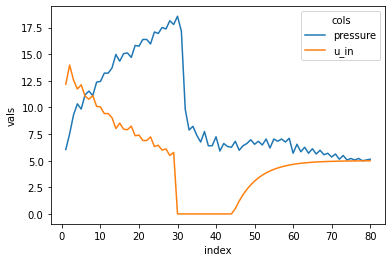

In [6]:

plot_pressure_x_u_in(df,2)

# Applying the Simple Fourier Transform

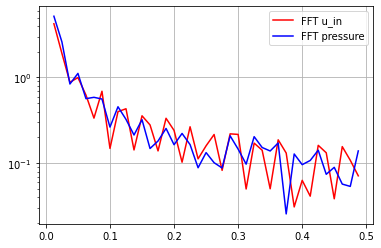

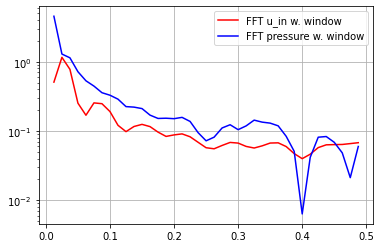

In [7]:
def FFT_(df,value):
    N = 80
    T = 1.0 
    df_loc = df.loc[df['breath_id'] == value]
    y = df_loc['u_in'].to_numpy()
    v = df_loc['pressure'].to_numpy()    

    w = blackman(N)
    
    yf = fft(y)
    vf = fft(v)
    ywf = fft(y*w)
    vwf = fft(v*w)
    
    xf = fftfreq(N, T)[:N//2]
    vxf = fftfreq(N, T)[:N//2]

    plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-r')
    plt.semilogy(vxf[1:N//2], 2.0/N * np.abs(vf[1:N//2]), '-b')
    plt.legend(['FFT u_in', 'FFT pressure'])
    plt.grid()
    plt.show()
    
    plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
    plt.semilogy(vxf[1:N//2], 2.0/N * np.abs(vwf[1:N//2]), '-b')
    plt.legend(['FFT u_in w. window','FFT pressure w. window'])
    plt.grid()
    plt.show()
    
FFT_(df,2)

# TRANSFORMATION COSINE

## What if before applying fourrier we applied the cosine?

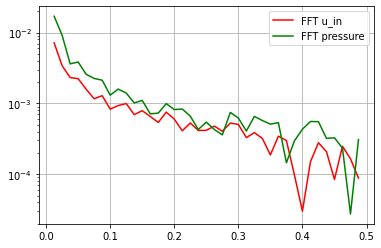

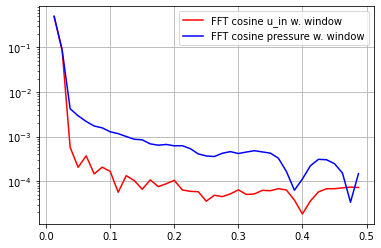

In [8]:
def FFT_cos(df,value):
    N = 80
    T = 1.0 
    df_loc = df.loc[df['breath_id'] == value]
    y = df_loc['u_in'].to_numpy()
    v = df_loc['pressure'].to_numpy()
    
    w = blackman(N)
    
    yf =fft(np.cos(np.deg2rad(y)))
    vf =fft(np.cos(np.deg2rad(v)))
    ywf = fft(np.cos(np.deg2rad(y))*w)
    vwf = fft(np.cos(np.deg2rad(v))*w)
    
    xf = fftfreq(N, T)[:N//2]
    vxf = fftfreq(N, T)[:N//2]

    plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-r')
    plt.semilogy(vxf[1:N//2], 2.0/N * np.abs(vf[1:N//2]), '-g')
    plt.legend(['FFT u_in', 'FFT pressure'])
    plt.grid()
    plt.show()
    
    
    plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
    plt.semilogy(vxf[1:N//2], 2.0/N * np.abs(vwf[1:N//2]), '-b')
    plt.legend(['FFT cosine u_in w. window','FFT cosine pressure w. window'])
    plt.grid()
    plt.show()
    
FFT_cos(df,2)

# More tests

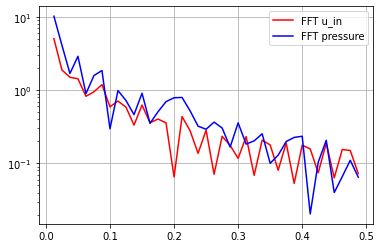

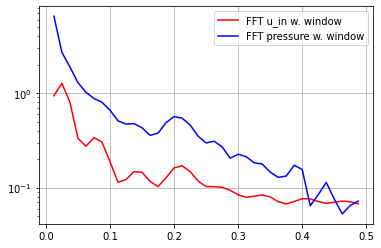

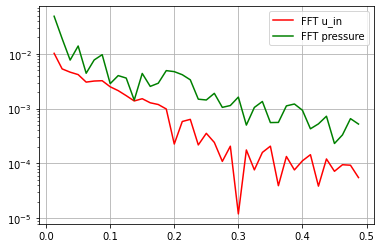

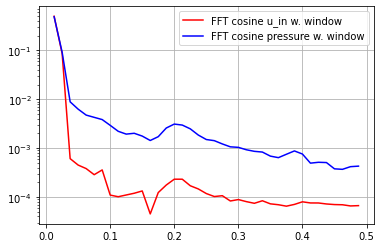

In [9]:
FFT_(df,3)
FFT_cos(df,3)

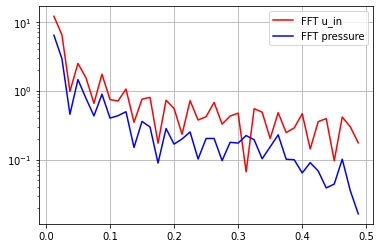

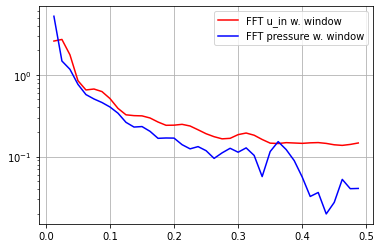

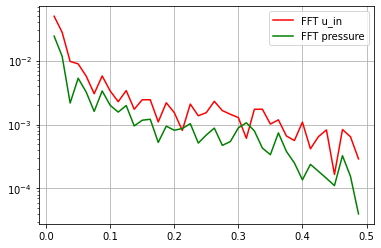

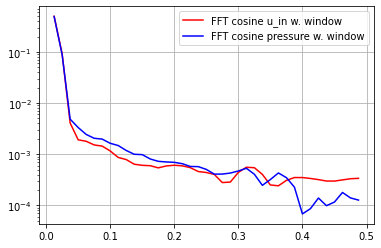

In [10]:
FFT_(df,10414)
FFT_cos(df,10414)